# VARIATIONAL AUTOENCODER MATRIX FACTORIZATION

## manipulate Movielens (ml-10m && ml-1m) datasets




 this notebook used for preprocessing lm-10m and lm-1m datasets for preparing them to training VAEMF model that related to Variational Autoencoder Matrix Factorization by Aldhubri, Ali Mohammed.





In [0]:
import os
import shutil
import sys

import numpy as np
from scipy import sparse
import pandas as pd

from sklearn.model_selection import train_test_split


### Data preprocessing
We load the data and create train/validation/test splits following strong generalization:

- We split all users into training/validation/test sets.

- We train models using the entire dataset where the rating rates between (1,5) batch of the training users.

- To evaluate, we take part of the click history from held-out (validation and test) users to learn the necessary user-level     representations for the model and then compute metrics by looking at how well the model ranks the rest of the unseen click     history from the held-out users.

    
                       
                          


- downloading the dataset from: http://files.grouplens.org/datasets/movielens/ml-1m.zip for ml-1m dataset and                                                                                                              !wget http://files.grouplens.org/datasets/movielens/ml-10m.zip

In [20]:
!wget http://files.grouplens.org/datasets/movielens/ml-10m.zip
#!wget http://files.grouplens.org/datasets/movielens/ml-1m.zip

--2020-05-04 17:28:59--  http://files.grouplens.org/datasets/movielens/ml-10m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65566137 (63M) [application/zip]
Saving to: ‘ml-10m.zip’

ml-10m.zip          100%[===================>]  62.53M  57.4MB/s    in 1.1s    

2020-05-04 17:29:00 (57.4 MB/s) - ‘ml-10m.zip’ saved [65566137/65566137]



In [21]:
!unzip ml-10m.zip
#!unzip ml-1m.zip

Archive:  ml-10m.zip
   creating: ml-10M100K/
  inflating: ml-10M100K/allbut.pl    
  inflating: ml-10M100K/movies.dat   
  inflating: ml-10M100K/ratings.dat  
  inflating: ml-10M100K/README.html  
  inflating: ml-10M100K/split_ratings.sh  
  inflating: ml-10M100K/tags.dat     


In [22]:
rnames = ['user_id','movie_id','rating','timestamp']
# /content/ml-10M100K/ratings.dat    #for ml-10m
# /content/ml-1m/ratings.dat         #for ml-10m

raw_data = pd.read_csv(os.path.join('/content/ml-10M100K/ratings.dat'),sep='::',names=rnames)

display(raw_data.head())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


- cleaning movies which are out side of the range

In [23]:
# this cell for 10m dataset
raw_data = raw_data[raw_data['movie_id']<=10681]

print(raw_data.head())
print('classified into  ',raw_data['rating'].unique().shape,'categories')
'unique users ',raw_data['user_id'].unique().max(),'unique movies',raw_data['movie_id'].unique().max()

   user_id  movie_id  rating  timestamp
0        1       122     5.0  838985046
1        1       185     5.0  838983525
2        1       231     5.0  838983392
3        1       292     5.0  838983421
4        1       316     5.0  838983392
classified into   (10,) categories


('unique users ', 71567, 'unique movies', 9019)

- Exclude timestamp column.

In [24]:
raw_data = raw_data.drop('timestamp', axis=1)
raw_data.head()

,user_id,movie_id,rating
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0
3,1,292,5.0
4,1,316,5.0


# Data splitting procedure
- split dataset into training set 90% and test set 10% ..we Select 25K users from training set as validation data.

In [81]:
#test_size=.0105 for ml-10m 
#test_size=.105  for ml-1m 

u_train,u_test = train_test_split(raw_data, test_size=.0105, shuffle=True)
u_train.shape,u_test.shape

((9443495, 3), (100209, 3))

In [82]:
#test_size=.1 

u_test, u_valid = train_test_split(u_test, test_size=0.1, shuffle=False)
u_test.shape,u_valid.shape

((90188, 3), (10021, 3))

# Save the data into (train_data, test_data,valid_data) text file format

In [0]:
cd /content/VAEMF/data/ml-10m/split/

/content/VAEMF/data/ml-10m/split


In [0]:
 #u_train.to_csv('u.data.train',header=None, index=False,sep='\t')
 u_test.to_csv('u.data.test',header=None, index=False,sep='\t')
 #u_valid.to_csv('u.data.valid',header=None, index=False,sep='\t')

In [0]:
u_train['user_id'].unique().shape,u_train['movie_id'].unique().shape

((69876,), (8312,))

clone Variational Autoencoder Matrix Factorization model  from https://github.com/Aldhubri/VAEMF.git 

In [0]:
# !wget https://github.com/Aldhubri/VAEMF.git

In [0]:
!unzip /content/VAEMF.zip

Archive:  /content/VAEMF.zip
   creating: VAEMF/
  inflating: VAEMF/.gitignore        
   creating: VAEMF/data/
   creating: VAEMF/data/ml-100k/
   creating: VAEMF/data/ml-100k/split/
  inflating: VAEMF/data/ml-100k/split/u.data.test  
  inflating: VAEMF/data/ml-100k/split/u.data.train  
  inflating: VAEMF/data/ml-100k/split/u.data.train.small  
  inflating: VAEMF/data/ml-100k/split/u.data.valid  
  inflating: VAEMF/data/ml-100k/u.data  
   creating: VAEMF/data/ml-10m/
  inflating: VAEMF/data/ml-10m/README.html  
  inflating: VAEMF/data/ml-10m/u.dat.test  
  inflating: VAEMF/data/ml-10m/u.data.train  
  inflating: VAEMF/data/ml-10m/u.data.valid  
   creating: VAEMF/data/ml-1m/
   creating: VAEMF/data/ml-1m/split/
  inflating: VAEMF/data/ml-1m/split/u.data.test  
  inflating: VAEMF/data/ml-1m/split/u.data.train  
  inflating: VAEMF/data/ml-1m/split/u.data.valid  
  inflating: VAEMF/README.md         
  inflating: VAEMF/requirements.txt  
   creating: VAEMF/scripts/
  inflating: VAEMF/sc

In [0]:
cd /content/VAEMF/scripts/

/content



Building network & initializing variables



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (h

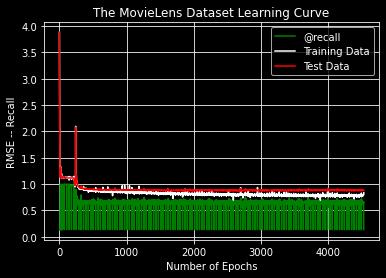

<Figure size 1440x2880 with 0 Axes>

In [0]:
run main.py

- Install tensorflow-gpu 1.15 

In [0]:
pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 39kB/s 
     |████████████████████████████████| 512kB 40.9MB/s 
     |████████████████████████████████| 3.8MB 34.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8ceca62b7fc21949f25b0d16216dd5dc2fcaebf752ab18f4ae973bac2207016d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  

In [0]:

#recall.sort() 
#rmse_train.sort(reverse=True)
#rmse_test.sort(reverse=True)
c=[]
train=[]
test=[]

for i in range(1000):
  c.append(recall[i])
  train.append(rmse_train[i])
  test.append(rmse_test[i])
c

[0.1296962,
 0.1296962,
 0.1296962,
 0.1296962,
 0.1296962,
 0.1299161,
 0.1302101,
 0.1303278,
 0.1318482,
 0.1320604,
 0.1321545,
 0.1321995,
 0.1322101,
 0.1322313,
 0.1323536,
 0.13241,
 0.13245,
 0.1325232,
 0.1325873,
 0.132589,
 0.1325997,
 0.13262,
 0.1326334,
 0.1326367,
 0.1326688,
 0.1326707,
 0.132677,
 0.1327188,
 0.1327203,
 0.1327266,
 0.1327501,
 0.1327676,
 0.1327903,
 0.132806,
 0.1328095,
 0.1328384,
 0.1328603,
 0.132903,
 0.1329269,
 0.1329395,
 0.1329758,
 0.1329807,
 0.1329844,
 0.1329993,
 0.1330026,
 0.1330052,
 0.1330155,
 0.1330236,
 0.1330275,
 0.133036,
 0.1330398,
 0.133066,
 0.1330782,
 0.1331001,
 0.1331338,
 0.1331419,
 0.133163,
 0.1331935,
 0.1332042,
 0.1332137,
 0.1332334,
 0.133234,
 0.1332631,
 0.1332745,
 0.1332867,
 0.1332994,
 0.1333209,
 0.1333232,
 0.133331,
 0.1333438,
 0.133349,
 0.1333524,
 0.1333582,
 0.1333695,
 0.1333731,
 0.133388,
 0.1333898,
 0.13339,
 0.1333923,
 0.1334017,
 0.1334154,
 0.1334181,
 0.1334221,
 0.1334367,
 0.1334463,

Loading best checkpointed model
n recall : 0.9613093


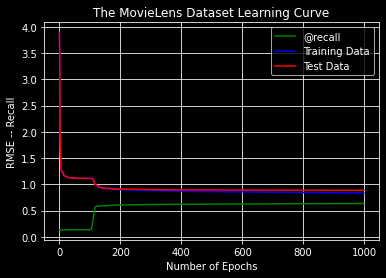

<Figure size 1440x2880 with 0 Axes>

In [0]:
print('Loading best checkpointed model')
#saver.restore(sess, model.model_filename)
#test(model, sess, saver, test_data, train_data=train_data)
print('n recall :',recall[-1])
with plt.style.context('dark_background'):
    plt.plot(c,color='g',label='@recall')
    plt.plot(train,label='Training Data',color='b')
    plt.plot(test,color='r',  label='Test Data')
    plt.title('The MovieLens Dataset Learning Curve')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE -- Recall')
    plt.legend()
    plt.grid()
    plt.figure(figsize=(20,40))
plt.show()

In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile('VAEMF.zip', 'w') as zipObj:
   # Iterate over all the files in directory
   for folderName, subfolders, filenames in os.walk('VAEMF'):
       for filename in filenames:
           #create complete filepath of file in directory
           filePath = os.path.join(folderName, filename)
           # Add file to zip
           zipObj.write(filePath)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd ..

/content
